# Exercise 2: Linear Regression

## Objective
Learn how to use Linear Regression to predict a continuous sensor feature from other sensor readings. Understand model training, evaluation, and the impact of multicollinearity.

## Step 0: Load & Prep Data
**Crucial Step:** We must reload the dataset and handle duplicate column names to ensure this notebook can run independently.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load raw data
features = pd.read_csv('dataset/features.txt', delim_whitespace=True, header=None)
X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Deduplicate Column Names (The Fix from Ex 1)
feature_names = features[1].values
seen = {}
unique_names = []
for name in feature_names:
    if name in seen:
        seen[name] += 1
        unique_names.append(f"{name}_{seen[name]}")
    else:
        seen[name] = 0
        unique_names.append(name)

X_train.columns = unique_names
X_test.columns = unique_names

print("Data loaded and columns deduplicated.")

C:\Users\mekyy\AppData\Local\Temp\ipykernel_26288\336134861.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('dataset/features.txt', delim_whitespace=True, header=None)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_26288\336134861.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_26288\336134861.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)


Data loaded and columns deduplicated.


## Step 1
Before we predict, let's check for **Data Leakage**. If other features are 99% correlated with our target, the model isn't learning—it's cheating.

In [3]:
target_column = 'tBodyAccMag-mean()'

# Calculate correlations with the target
correlations = X_train.corrwith(X_train[target_column])
top_correlations = correlations.abs().sort_values(ascending=False).head(10)

print("Top 10 Features Correlated with Target:")
print(top_correlations)

Top 10 Features Correlated with Target:
tGravityAccMag-sma()     1.000000
tGravityAccMag-mean()    1.000000
tBodyAccMag-sma()        1.000000
tBodyAccMag-mean()       1.000000
tBodyAcc-sma()           0.999111
fBodyAcc-sma()           0.984029
tBodyAcc-std()-X         0.977817
tBodyAcc-mad()-X         0.975759
fBodyAcc-std()-X         0.974479
fBodyAcc-mad()-X         0.973431
dtype: float64


## Step 2: Select Features & Scale
We remove the target from the predictors. Note: Ideally, we should also remove the "cheating" features identified above, but for this exercise, we will proceed to see the result.

In [7]:
from sklearn.preprocessing import StandardScaler

# Define Target and Predictors
y_train_reg = X_train[target_column]
y_test_reg = X_test[target_column]

X_train_reg = X_train.drop(columns=[target_column])
X_test_reg = X_test.drop(columns=[target_column])

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

## Step 3: Train & Evaluate Linear Regression
Train the model and check the RMSE and R2 score.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train_reg)

# Predict
y_pred = reg_model.predict(X_test_scaled)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
r2 = r2_score(y_test_reg, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Intercept: {reg_model.intercept_:.4f}")

RMSE: 0.0000
R2 Score: 1.0000
Intercept: -0.5439


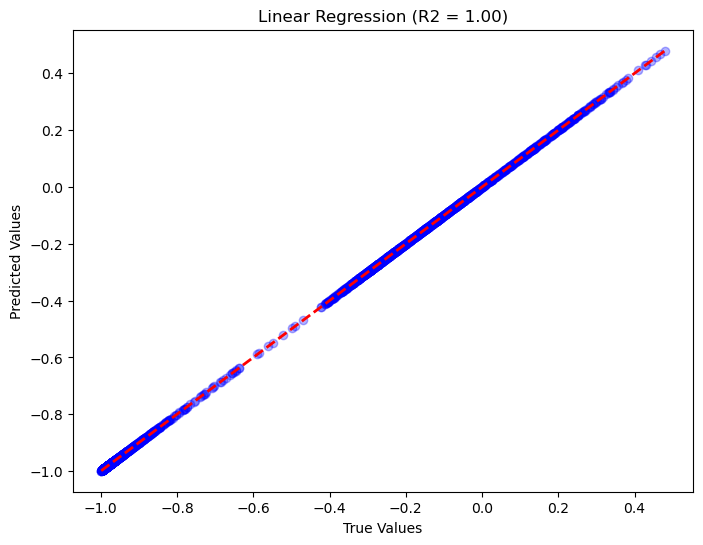

In [12]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred, alpha=0.3, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression (R2 = {r2:.2f})')
plt.show()

## Step 5: Reflection Questions
1. Did you notice features with correlation > 0.95? Is this "good" prediction or just redundancy?
2. How does scaling affect regression coefficients?
3. Why is linear regression limited in predicting complex human motion patterns?

## Step 6: Different data


RMSE: 5.56
R2 Score: 0.88


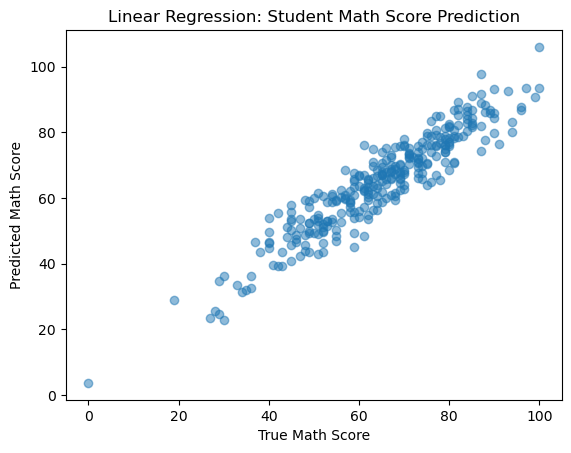

In [20]:
# Step 6: Student Performance Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('StudentsPerformance[1].csv')

# Define features and target
target = 'math score'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numeric columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numeric_cols = ['reading score', 'writing score']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build pipeline: preprocessing + Linear Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Linear Regression: Student Math Score Prediction')
plt.show()
